In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import os

In [2]:
os.chdir('/gpfs/alpine/scratch/gkhelash/bip109/mfs/ml_analysis/analysis_folder')

In [3]:
nhl_labels = np.load("numpy_files/nhl_labels.npy")
hl_labels = np.load("numpy_files/hl_labels.npy")

In [4]:
files = sorted(glob.glob("output/*.txt"))

In [27]:
# resids of excluded sections of protein that are not of interest such as floppy loops or termini
# single resids can be added as a list
# I recommend you exclude resids as you analyze them so the next interesting region becomes visible
# The next two cells must be rerun for changes in this list to take effect

excluded = np.concatenate(([1,2], np.arange(9991,9999), np.arange(8881,8889))).tolist()

In [28]:
start=0
end=10

print('loading files', start, 'to', end-1, 'of', len(files), 'total files')

loading files 0 to 9 of 98 total files


In [29]:
feature_list = []
for file in files[start:end]:
    pickleFile = open(file, 'rb')
    temp = pickle.load(pickleFile)
    if temp:
        feature_list.extend([x for x in temp if ((int(x[3][0]) not in excluded) and (int(x[3][2]) not in excluded))])
        

In [30]:
len(feature_list)

31488

In [16]:
hit_start=0
hit_end=100
print('loading hits', hit_start, 'to', hit_end-1, 'of', len(feature_list), 'total hits')

[(q,x[3]) for q,x in enumerate(feature_list)][hit_start:hit_end]

loading hits 0 to 99 of 36599 total hits


[(0, array(['1', 'N', '107', 'CB'], dtype='<U21')),
 (1, array(['1', 'N', '107', 'CG'], dtype='<U21')),
 (2, array(['1', 'N', '107', 'CE1'], dtype='<U21')),
 (3, array(['1', 'N', '107', 'CZ'], dtype='<U21')),
 (4, array(['1', 'N', '107', 'CD2'], dtype='<U21')),
 (5, array(['1', 'N', '107', 'CE2'], dtype='<U21')),
 (6, array(['1', 'N', '108', 'C'], dtype='<U21')),
 (7, array(['1', 'N', '115', 'CA'], dtype='<U21')),
 (8, array(['1', 'N', '115', 'CB'], dtype='<U21')),
 (9, array(['1', 'N', '115', 'CG2'], dtype='<U21')),
 (10, array(['1', 'N', '115', 'CG1'], dtype='<U21')),
 (11, array(['1', 'N', '115', 'CD'], dtype='<U21')),
 (12, array(['1', 'N', '115', 'C'], dtype='<U21')),
 (13, array(['1', 'N', '115', 'O'], dtype='<U21')),
 (14, array(['1', 'N', '116', 'N'], dtype='<U21')),
 (15, array(['1', 'N', '116', 'CA'], dtype='<U21')),
 (16, array(['1', 'N', '116', 'CB'], dtype='<U21')),
 (17, array(['1', 'N', '116', 'CG'], dtype='<U21')),
 (18, array(['1', 'N', '116', 'CD1'], dtype='<U21')),
 

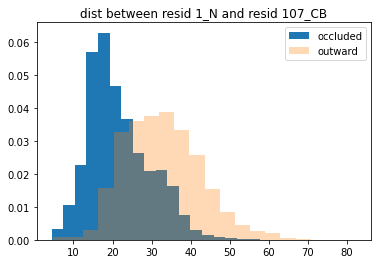

In [17]:
q=0 # index of residue pair from list above. indices are on the left.
feature = feature_list[q][0]

resid_1 = feature_list[q][3][0]
atom_1 = feature_list[q][3][1]
resid_2 = feature_list[q][3][2]
atom_2 = feature_list[q][3][3]

plt.hist(feature_list[q][2].flatten(), density=True, label="occluded", bins=20) # HL class
plt.hist(feature_list[q][1].flatten(), alpha=0.3, density=True, label="outward", bins=20) # NHL class
plt.legend()
plt.title("dist between resid " + str(resid_1) + "_" + atom_1 + " and resid " + str(resid_2) + "_" + atom_2);


In [21]:
feature_list[q][4][0]

('occluded', True, 20.2671760559082)

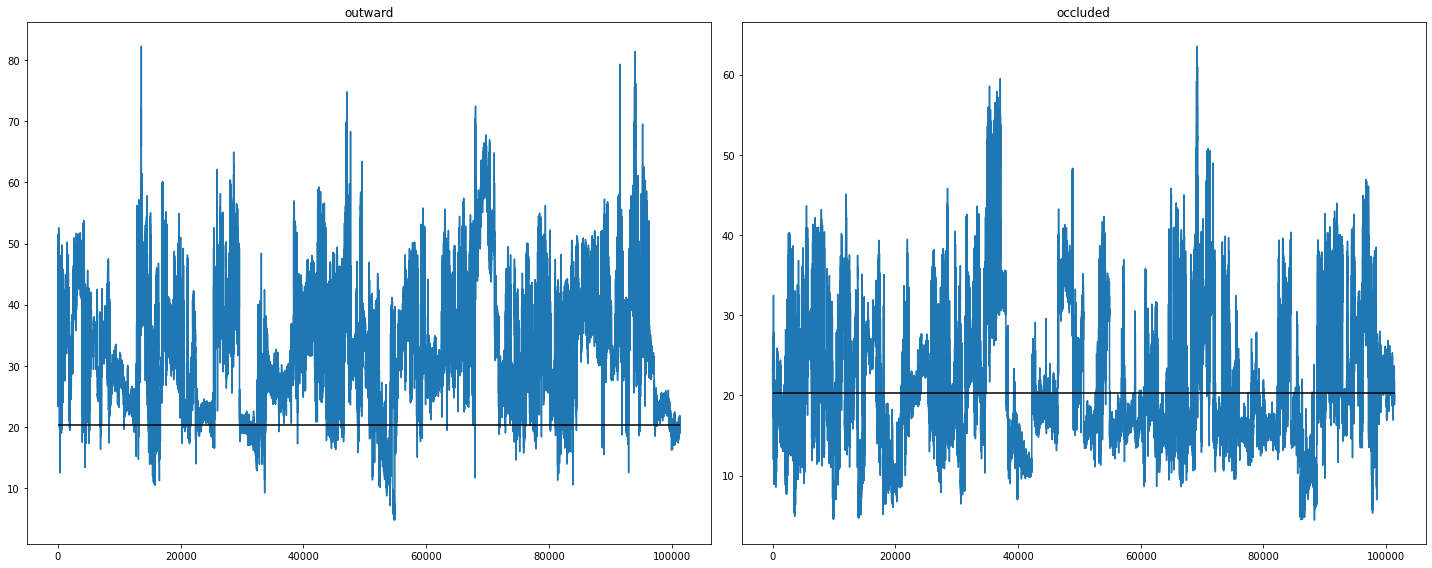

In [22]:
hall_ligs = ["occluded"]
nhall_ligs = ["outward"]

threshold=feature_list[q][4][0][2]
stuff=[]
for lig in nhall_ligs:
    ind = [i for i,x in enumerate(nhl_labels) if lig in x]
    temp=[]
    for i in ind:
        temp.append(feature_list[q][1][i])
    temp = np.asarray(temp)
    stuff.append((lig,temp))

for lig in hall_ligs:
    ind = [i for i,x in enumerate(hl_labels) if lig in x]
    temp=[]
    for i in ind:
        temp.append(feature_list[q][2][i])
    temp = np.asarray(temp)
    stuff.append((lig,temp))

fig, axs = plt.subplots(1,2, figsize=(20, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i,x in enumerate(stuff):

    axs[i].plot(x[1].flatten())
    axs[i].set_title(x[0])
    axs[i].hlines(threshold, 0, len(x[1].flatten()), zorder=100, colors="black")
plt.tight_layout()

In [23]:
hall_ligs = ["occluded"]
nhall_ligs = ["outward"]

tmp=[]
for lig in hall_ligs:
    indices = [i for i,x in enumerate(hl_labels) if lig in x]
    for i in indices:
        tmp.append((hl_labels[i], (feature_list[q][2][i]>threshold).mean()))
        
print("%6s | %8s" % ("traj", "mean above threshold"))
print("----------------------------")
    
for c1, c2 in tmp:
    print("%6s | %8f" % (c1, c2))
    
print("------------------------------")
tmp=[]
for lig in nhall_ligs:
    indices = [i for i,x in enumerate(nhl_labels) if lig in x]
    for i in indices:
        tmp.append((nhl_labels[i], (feature_list[q][1][i]>threshold).mean()))

print("%6s | %8s" % ("traj", "mean above threshold"))
print("----------------------------")
    
for c1, c2 in tmp:
    print("%6s | %8f" % (c1, c2))


  traj | mean above threshold
----------------------------
occluded_0 | 0.394269
occluded_1 | 0.751362
occluded_2 | 0.539427
occluded_3 | 0.748283
occluded_4 | 0.146578
occluded_5 | 0.735970
occluded_6 | 0.488042
occluded_7 | 0.707791
occluded_8 | 0.887994
occluded_9 | 0.080038
occluded_10 | 0.176178
occluded_11 | 0.932749
occluded_12 | 0.418660
occluded_13 | 0.098508
occluded_14 | 0.305470
occluded_15 | 0.394269
occluded_16 | 0.761781
occluded_17 | 0.361591
occluded_18 | 0.097087
occluded_19 | 0.414634
occluded_20 | 0.047123
occluded_21 | 0.885626
occluded_22 | 0.766043
occluded_23 | 0.626095
------------------------------
  traj | mean above threshold
----------------------------
outward_0 | 0.982003
outward_1 | 0.985082
outward_2 | 0.995027
outward_3 | 0.844660
outward_4 | 0.991475
outward_5 | 0.875681
outward_6 | 0.999290
outward_7 | 0.470755
outward_8 | 0.996922
outward_9 | 0.999763
outward_10 | 0.939616
outward_11 | 0.983898
outward_12 | 0.529481
outward_13 | 0.960455
outward_14 